# Proyek Analisis Data: Bike Sharing
- **Nama:** Rafli Arrasyid
- **Email:** rafly111104@gmail.com
- **ID Dicoding:** rafly111104

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren penggunaan sepeda di berbagai musim sepanjang tahun?
2. Bagaimana variasi penggunaan sepeda pada hari kerja dibandingkan dengan hari libur?

## Import Semua Packages/Library yang Digunakan

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [56]:
day_data = pd.read_csv('Bike-sharing-dataset/day.csv')
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

### Assessing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

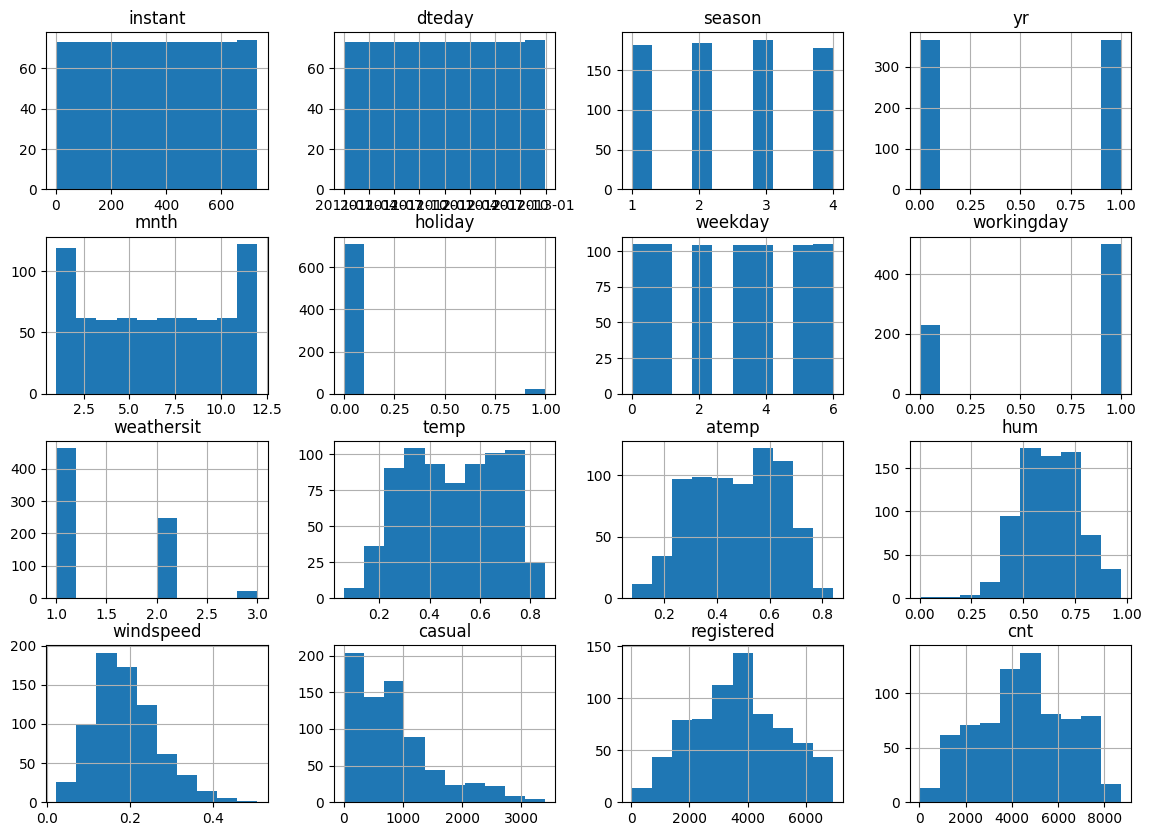

In [57]:
# Informasi dasar tentang dataset
day_data.info()

# Statistik deskriptif dari dataset
day_data.describe()

# Memeriksa nilai yang hilang
day_data.isnull().sum()

# Melihat distribusi data
day_data.hist(figsize=(14, 10))
plt.show()

### Cleaning Data

In [58]:
# Menyalin data asli untuk proses pembersihan
cleaned_data = day_data.copy()

# Mengubah kolom dteday menjadi tipe datetime
cleaned_data['dteday'] = pd.to_datetime(cleaned_data['dteday'])

# Mengubah tipe data untuk kolom kategori
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    cleaned_data[col] = cleaned_data[col].astype('category')

# Memverifikasi pembersihan data
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

## Exploratory Data Analysis (EDA)

### Analisis Statistik Deskriptif

In [59]:
# Statistik deskriptif dari dataset
cleaned_data.describe()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### Visualisasi Distribusi Pengguna Sepeda

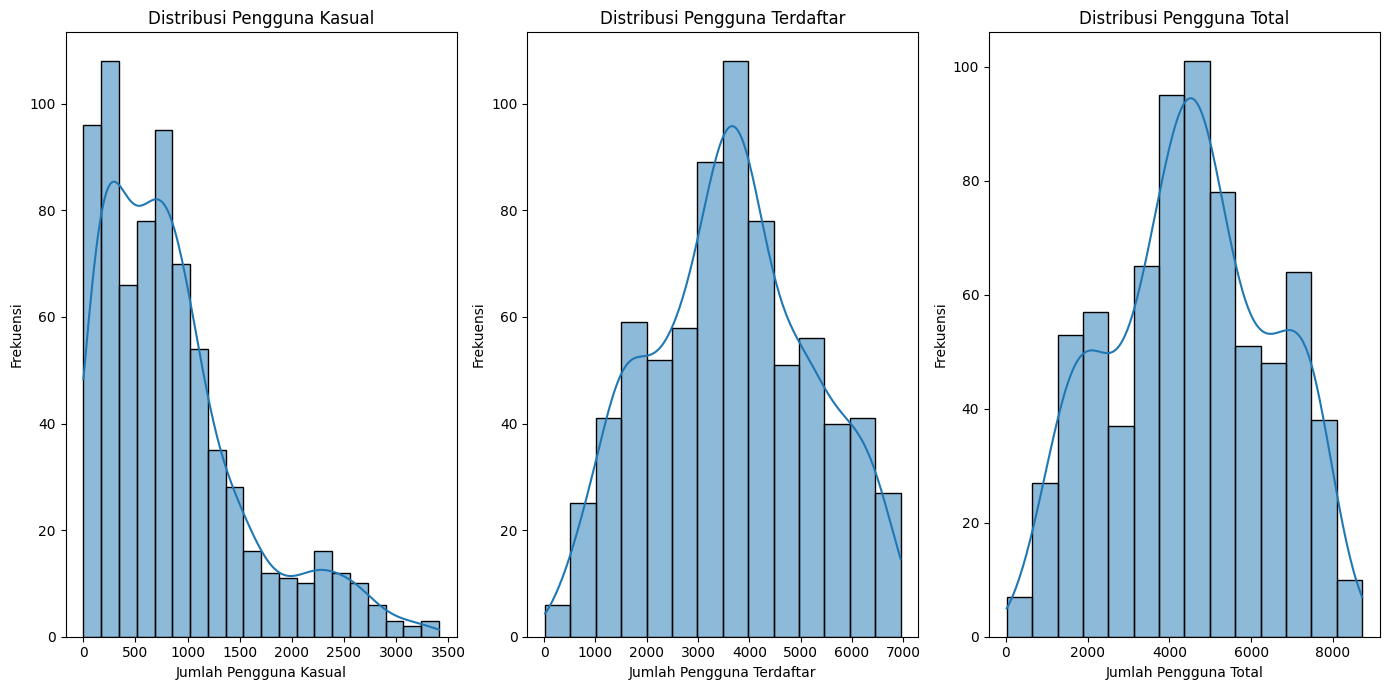

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi pengguna casual, registered, dan total
plt.figure(figsize=(14, 7))

# Distribusi pengguna casual
plt.subplot(1, 3, 1)
sns.histplot(cleaned_data['casual'], kde=True)
plt.title('Distribusi Pengguna Kasual')
plt.xlabel('Jumlah Pengguna Kasual')
plt.ylabel('Frekuensi')

# Distribusi pengguna registered
plt.subplot(1, 3, 2)
sns.histplot(cleaned_data['registered'], kde=True)
plt.title('Distribusi Pengguna Terdaftar')
plt.xlabel('Jumlah Pengguna Terdaftar')
plt.ylabel('Frekuensi')

# Distribusi pengguna total
plt.subplot(1, 3, 3)
sns.histplot(cleaned_data['cnt'], kde=True)
plt.title('Distribusi Pengguna Total')
plt.xlabel('Jumlah Pengguna Total')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### Analisis Penggunaan Sepeda Berdasarkan Musim

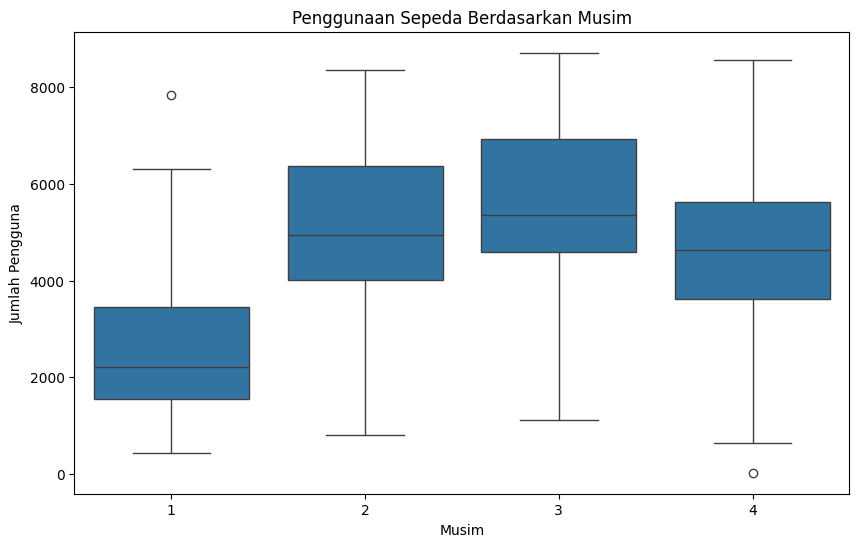

In [61]:
# Penggunaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='season', y='cnt')
plt.title('Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.show()

### Pengaruh Hari Kerja dan Hari Libur terhadap Penggunaan Sepeda

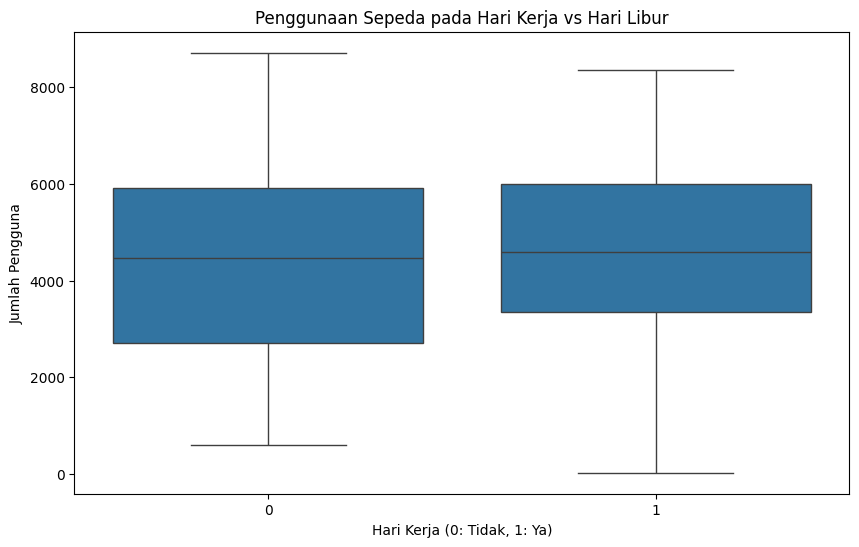

In [62]:
# Penggunaan sepeda pada hari kerja vs hari libur
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='workingday', y='cnt')
plt.title('Penggunaan Sepeda pada Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Pengguna')
plt.show()

### Analisis Penggunaan Sepeda Berdasarkan Kondisi Cuaca

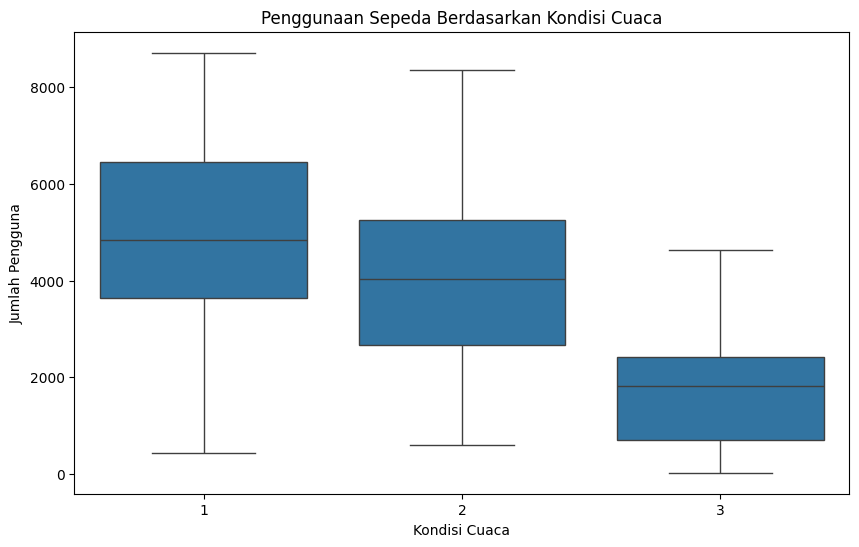

In [63]:
# Penggunaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='weathersit', y='cnt')
plt.title('Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna')
plt.show()

### Korelasi Antar Variabel

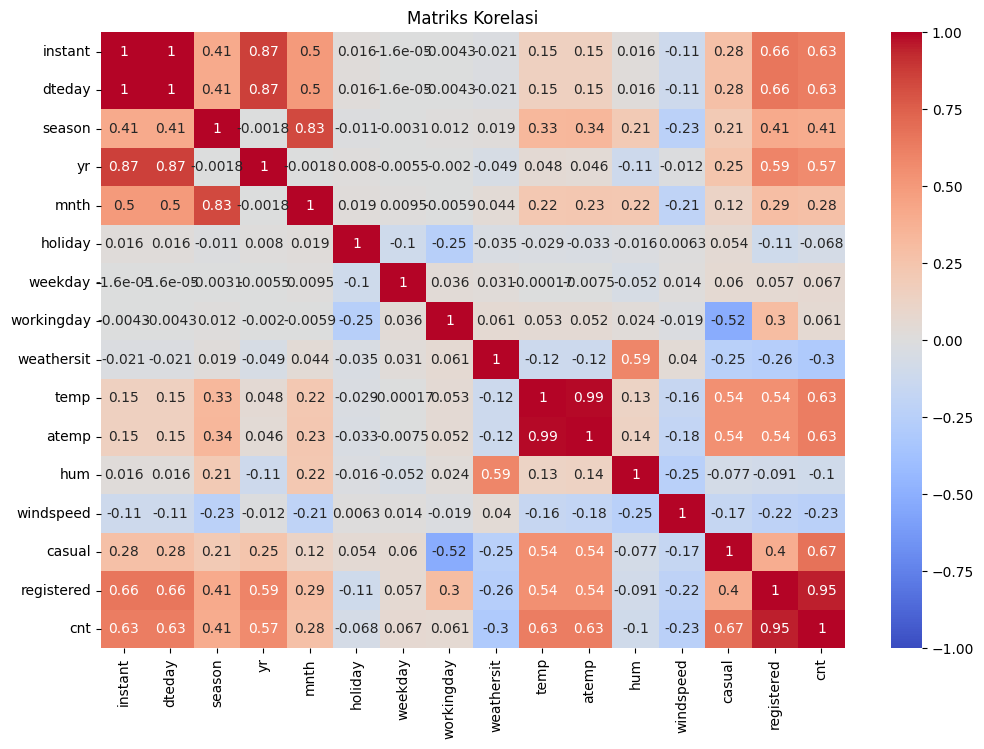

In [64]:
# Korelasi antar variabel
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda di berbagai musim sepanjang tahun?

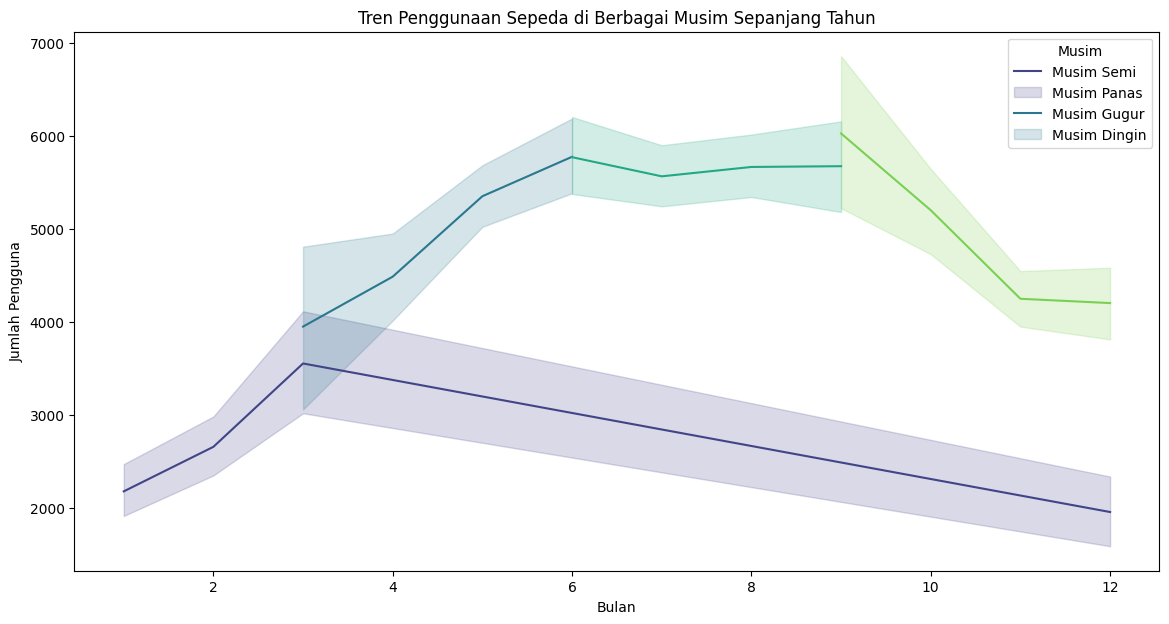

In [65]:
# Pertanyaan 1: Bagaimana tren penggunaan sepeda di berbagai musim sepanjang tahun?

# Menambahkan kolom bulan dan tahun dari kolom tanggal
cleaned_data['month'] = cleaned_data['dteday'].dt.month
cleaned_data['year'] = cleaned_data['dteday'].dt.year

# Tren penggunaan sepeda berdasarkan musim
plt.figure(figsize=(14, 7))
sns.lineplot(data=cleaned_data, x='month', y='cnt', hue='season', palette='viridis')
plt.title('Tren Penggunaan Sepeda di Berbagai Musim Sepanjang Tahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.legend(title='Musim', labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

### Pertanyaan 2: Bagaimana variasi penggunaan sepeda pada hari kerja dibandingkan dengan hari libur?

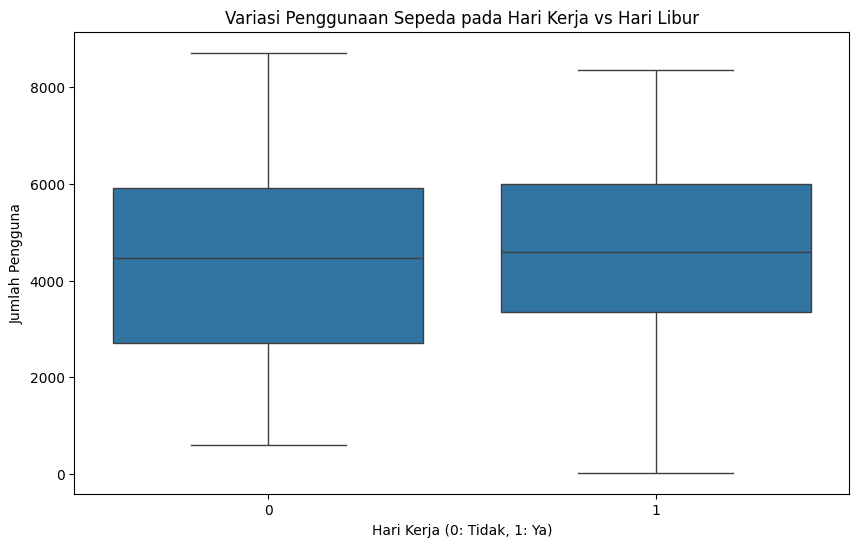

In [66]:
# Pertanyaan 2: Bagaimana variasi penggunaan sepeda pada hari kerja dibandingkan dengan hari libur?

# Visualisasi penggunaan sepeda pada hari kerja vs hari libur
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, x='workingday', y='cnt')
plt.title('Variasi Penggunaan Sepeda pada Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Pengguna')
plt.show()


## Conclusion

### Conclusion Pertanyaan 1

Dari analisis tren penggunaan sepeda berdasarkan musim sepanjang tahun, terlihat bahwa jumlah pengguna sepeda cenderung lebih tinggi pada musim panas dan musim gugur. Penggunaan sepeda paling rendah terjadi pada musim dingin, sedangkan musim semi menunjukkan penggunaan yang moderat. Hal ini menunjukkan bahwa kondisi cuaca yang lebih hangat dan cerah mendorong lebih banyak orang untuk menggunakan sepeda.

### Conclusion Pertanyaan 2

Dari analisis variasi penggunaan sepeda pada hari kerja dibandingkan dengan hari libur, terlihat bahwa penggunaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan hari libur. Ini menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi untuk bekerja atau beraktivitas harian pada hari kerja.
